In [64]:
import fsspec
import pandas as pd
import matplotlib.pyplot as plt
import functools
import seaborn as sns
from pyprojroot import here
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [34]:
@functools.lru_cache(maxsize=None)
def load_pi(path, start, stop):
    print('attempting to load', path)
    with fsspec.open(path) as f:
        df = pd.read_csv(f, sep='\t')
        select = df.loc[(df.start > start) & (df.stop < stop)]
        return select.pi.values

In [59]:
populations = 'AOM', 'BFM', 'GWA', 'GNS', 'BFS', 'CMS', 'UGS', 'GAS', 'KES'
pop_labels = {
    'AOM': 'AO $coluzzii$',
    'BFM': 'BF $coluzzii$',
    'GWA': 'GW',
    'GNS': 'GN $gambiae$',
    'BFS': 'BF $gambiae$',
    'CMS': 'CM $gambiae$',
    'UGS': 'UG $gambiae$',
    'GAS': 'GA $gambiae$',
    'KES': 'KE',
    'colony': 'colony'
}
pop_colours = {
    'AOM': sns.color_palette('YlOrBr', 5)[4],
    'BFM': sns.color_palette('Reds', 3)[1],
    'GWA': sns.color_palette('YlOrBr', 5)[1],
    'GNS': sns.color_palette('Blues', 3)[0],
    'BFS': sns.color_palette('Blues', 3)[1],
    'CMS': sns.color_palette('Blues', 3)[2],
    'UGS': sns.color_palette('Greens', 2)[0],
    'GAS': sns.color_palette('Greens', 2)[1],
    'KES': sns.color_palette('Greys', 5)[2],
    'colony': sns.color_palette('Greys', 5)[-1]
}
for p in pop_colours:
    h = '#%02x%02x%02x' % tuple(int(255*c) for c in pop_colours[p])
    pop_colours[p] = h
pop_colours

{'AOM': '#a93b03',
 'BFM': '#fa6949',
 'GWA': '#fece65',
 'GNS': '#c5daee',
 'BFS': '#6aadd5',
 'CMS': '#2070b4',
 'UGS': '#addea7',
 'GAS': '#37a055',
 'KES': '#959595',
 'colony': '#333333'}

In [63]:
def plot_pi(lw=1, fn=None):
    fig, ax = plt.subplots(facecolor='w')
    sns.despine(ax=ax, offset=5)
    regions = {"3R": (1000000, 37000000)}
    path_template = 'gs://ag1000g-release/phase1.AR3/extras/diversity/pi.windows_eqaccess/20000.{chrom}.{pop}.txt'
    diversity = dict()

    for pop in populations:
        diversity[pop] = dict()
        for chrom in regions.keys():
            path = path_template.format(chrom=chrom, pop=pop)
            start, stop = regions[chrom]
            diversity[pop] = load_pi(path, start, stop) * 100
            
    box = ax.boxplot(
        x=[diversity[pop] for pop in populations],
        labels=[pop_labels[pop] for pop in populations],
        patch_artist=True, 
        medianprops={"color":"k", "linewidth":lw},
        whiskerprops={"color":"k"}, 
        capprops={"color":"k"},
        showfliers=False,
        flierprops={"c":"k", "markersize":2})
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
    ax.set_ylabel(r'$\pi$ (%)', rotation=0, fontsize=12)
    ax.yaxis.set_label_coords(0, 1, transform=ax.transAxes)
    ax.grid(axis='y')

    for patch, color in zip(box['boxes'], [pop_colours[pop] for pop in populations]):
        patch.set_facecolor(color)
        patch.set_linewidth(lw)
        
    if fn:
        fig.savefig(fn, bbox_inches='tight')

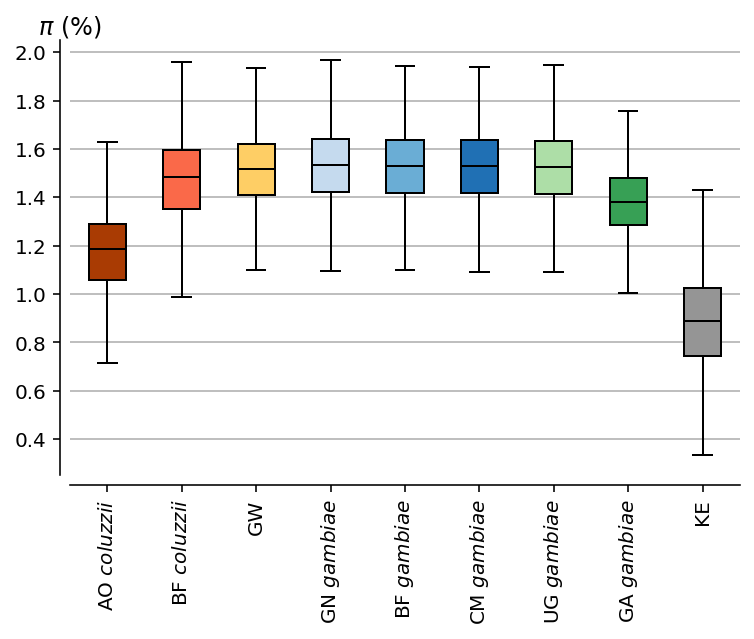

In [65]:
plot_pi(fn=here() / 'artwork/chapter4/pi.pdf')